In [1]:
# 처음에 VGG16 을 이용해서 훈련을 시작 하였으나 VGG16은 기본 (224, 224, 3) 인데
# 현재 cifar10은 (32, 32, 3) 이어서 매우 나쁜 훈련 결과가 나왔다...
# 그래서 MObileNet 으로 바꾸었다

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
print(len(tfds.list_builders()))
print(tfds.list_builders())

356
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'bucc', 'c4', 'c4_wsrs', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar100_n', 'cifar10_1', 'cifar10_corrupted', 'cifar10_n', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'conll2002', 'conll2003', 'controlled_noisy_web_labels', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'cre

In [4]:
data, info = tfds.load('cifar10', with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='C:\\Users\\euiso\\tensorflow_datasets\\cifar10\\3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        

In [5]:
ds_train = data['train']
print(len(ds_train))

ds_train = ds_train.map(lambda x: (x['image'], x['label']))
ds_train = ds_train.filter(lambda x, y: y is not None)
ds_train = ds_train.shuffle(12000).batch(60000)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1].shape)
print(type(batch[0]), type(batch[1]))

x_train , y_train = batch
print(x_train.shape, y_train.shape)
print(type(x_train), type(y_train))

50000
(50000, 32, 32, 3) (50000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(50000, 32, 32, 3) (50000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


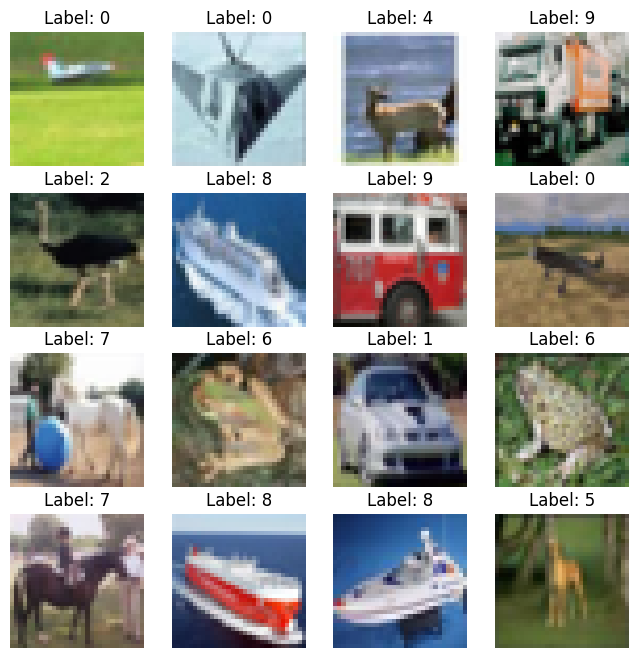

In [6]:
import matplotlib.pyplot as plt
import random

random_idx = np.random.randint(0, len(x_train), size=16)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_idx):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[idx])
    plt.title(f"Label: {y_train[idx]}")
    plt.axis("off")

plt.show()

In [7]:
ds_test = data['test']
print(len(ds_test))

ds_test = ds_test.map(lambda x: (x['image'], x['label']))
ds_test = ds_test.shuffle(2000).batch(10000)
batch = next(iter(ds_test))
print(batch[0].shape, batch[1].shape)
print(type(batch[0]), type(batch[1]))

x_test , y_test = batch
print(x_test.shape, y_test.shape)
print(type(x_test), type(y_test))

10000
(10000, 32, 32, 3) (10000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
(10000, 32, 32, 3) (10000,)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


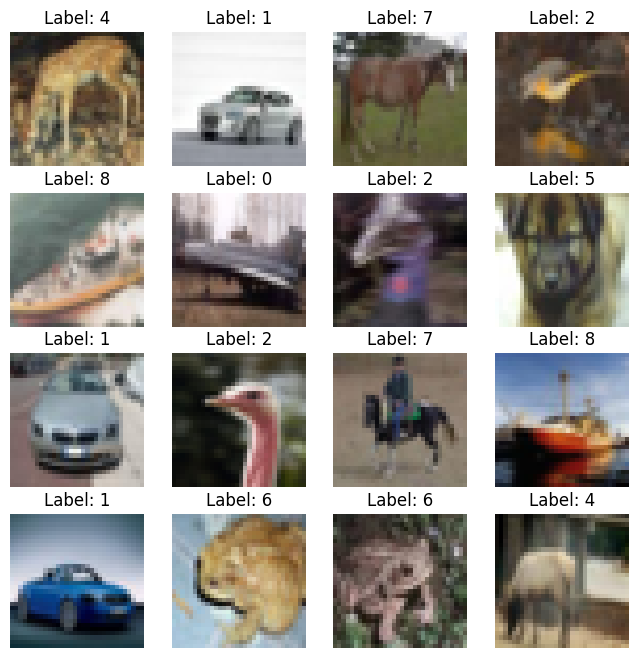

In [8]:
random_idx = np.random.randint(0, len(x_test), size=16)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_idx):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Label: {y_test[idx]}")
    plt.axis("off")

plt.show()

In [9]:
from tensorflow.keras.utils import to_categorical

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

x_train = np.array(x_train) / 255
x_test = np.array(x_test) /255

print(x_train.shape, type(x_train), y_train.shape, type(y_train))

y_train = to_categorical(np.array(y_train))
y_test = to_categorical(np.array(y_test))

(50000, 32, 32, 3) <class 'tensorflow.python.framework.ops.EagerTensor'> (50000,) <class 'tensorflow.python.framework.ops.EagerTensor'>
(50000, 32, 32, 3) <class 'numpy.ndarray'> (50000,) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNet


base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential()
model.add(base_model)

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(Conv2D(32,(3, 3), activation='relu'))
# # model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

C:\Users\euiso\AppData\Local\Temp\ipykernel_9020\3835134163.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [11]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime

earlystopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

start_time = datetime.now()

history = model.fit(x_train, y_train, batch_size=32, epochs=30,
                 validation_data=(x_test, y_test), callbacks=[earlystopping])

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 127ms/step - acc: 0.4967 - loss: 1.5463 - val_acc: 0.7122 - val_loss: 0.8493
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - acc: 0.7352 - loss: 0.8034 - val_acc: 0.7473 - val_loss: 0.7350
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - acc: 0.7811 - loss: 0.6662 - val_acc: 0.7606 - val_loss: 0.7160
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - acc: 0.8099 - loss: 0.5847 - val_acc: 0.7763 - val_loss: 0.7089
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - acc: 0.8328 - loss: 0.5211 - val_acc: 0.7744 - val_loss: 0.7210
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - acc: 0.8449 - loss: 0.4791 - val_acc: 0.7656 - val_loss: 0.7752
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - acc: 0.8562 - loss: 0.4433 - val_acc: 0.7811 - val_loss: 0.6837
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 158ms/step - acc: 0.8755 - loss: 0.3829 - val_acc: 0.7732 - val_loss: 0.8181
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━

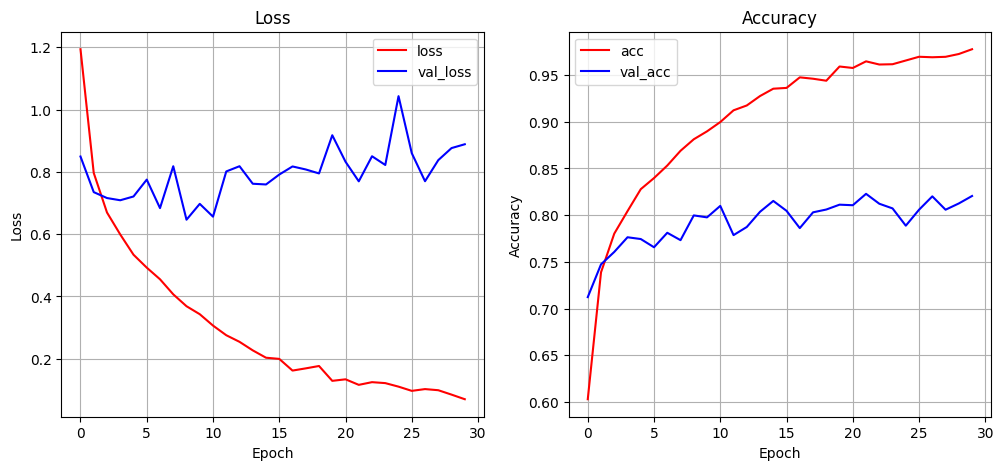

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss', color='red')
plt.plot(history.history['val_loss'], label='val_loss', color='blue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='acc', color='red')
plt.plot(history.history['val_acc'], label='val_acc', color='blue')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - acc: 0.8157 - loss: 0.8734
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step
[5.75865151e-08 1.19144644e-07 3.28454597e-10 5.83691069e-08
 4.11378154e-11 1.09128946e-08 1.00281439e-09 7.73527978e-11
 3.51823317e-08 9.99999762e-01] 9


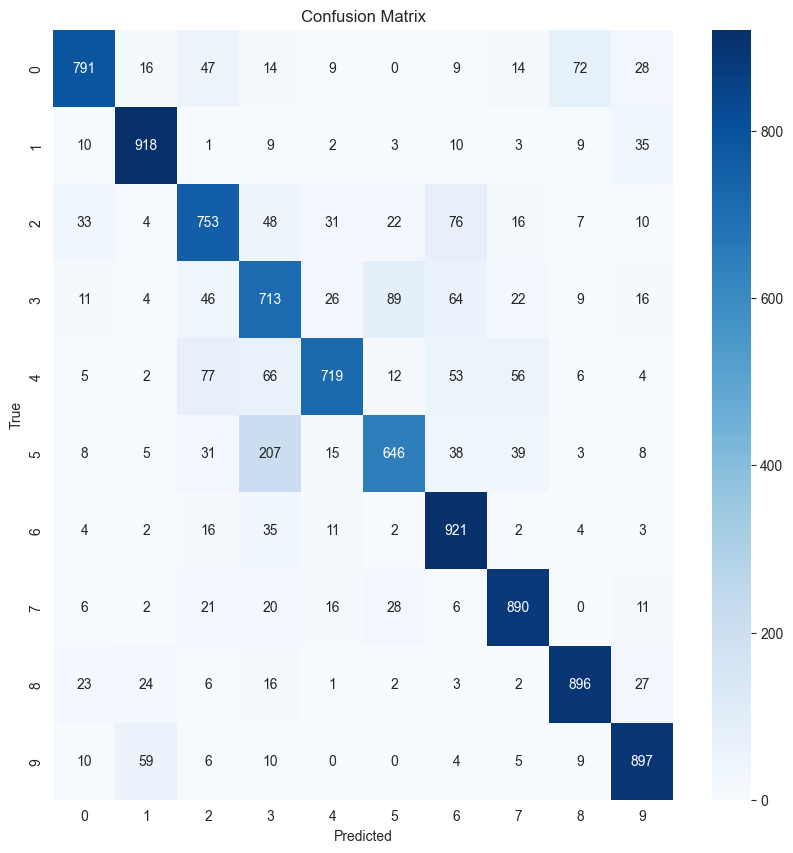

In [13]:
from sklearn.metrics import confusion_matrix

model.evaluate(x_test, y_test)

pred_ys = model.predict(x_test)
print(pred_ys[0], np.argmax(pred_ys[0]))


plt.figure(figsize=(10, 10))
sns.set_style('whitegrid')
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.legend()
# plt.grid()

plt.show()